In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('voice.csv')

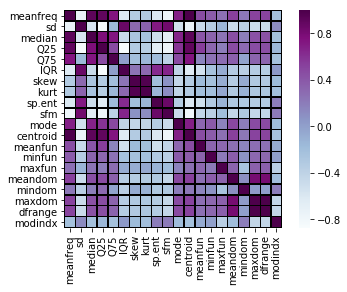

In [3]:
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="BuPu", linecolor='black')

In [4]:
col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<class 'numpy.ndarray'>


In [5]:
df = df.rename(columns={'label': 'gender'})
df.columns.values

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'gender'],
      dtype=object)

In [6]:
#Lets use SVM:
#Bootstrapping

#Producing X and y
X = df.drop(['gender'], 1)
y = df['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=20,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/pallavi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Train accuracy : 0.9763220205209155
Test accuracy : 0.9747634069400631
[[313   7]
 [  9 305]]
Misclassification Rate : 0.025236593059936908


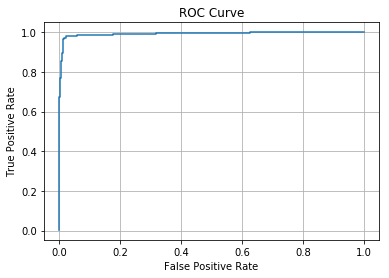

ROC AUC : 0.9923168789808916


In [7]:

from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#random_state=10))
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

c = confusion_matrix(y_test, y_pred)

# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)

Train accuracy : 1.0
Test accuracy : 0.7176656151419558
[[320   0]
 [179 135]]
Misclassification Rate : 0.2823343848580442


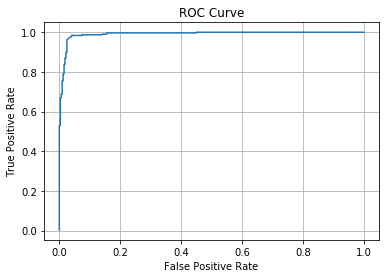

ROC AUC : 0.9909434713375797


In [8]:
# kernal is rbf
from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'rbf', random_state=10,gamma=8)
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)

Train accuracy : 0.6033938437253354
Test accuracy : 0.6025236593059937
[[184 136]
 [116 198]]
Misclassification Rate : 0.39747634069400634


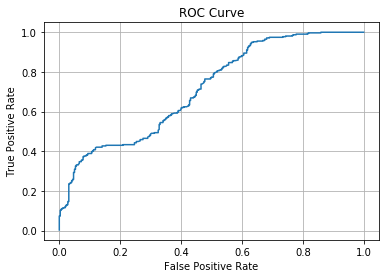

ROC AUC : 0.7129876592356689


In [9]:
#kernel is sigmoid
from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'sigmoid', random_state=0, gamma=1000,coef0=.1)
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)

Train accuracy : 0.9108129439621152
Test accuracy : 0.9227129337539433
[[283  37]
 [ 12 302]]
Misclassification Rate : 0.07728706624605679


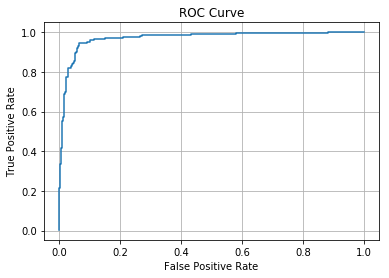

ROC AUC : 0.9712480095541401


In [10]:
#kernel is polynomial

from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'poly',  degree = 2)
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)

Train accuracy : 0.9593528018942383
Test accuracy : 0.9684542586750788
[[290  11]
 [  9 324]]
Misclassification Rate : 0.031545741324921134


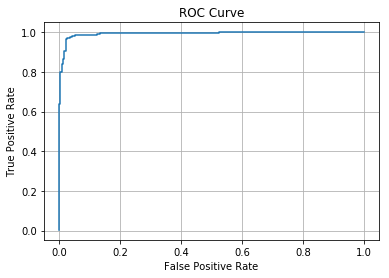

ROC AUC : 0.9927967834944579


In [11]:
#Lets use SVM:
#Bootstrapping
df1=df[['meanfreq','sd','median','meanfun','gender']]

#Producing X and y
X = df1.drop(['gender'], 1)
y = df1['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
classifier.fit(X_train, y_train)

print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)

from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)

Train accuracy : 0.9573796369376479
Test accuracy : 0.9668769716088328
[[288  13]
 [  8 325]]
Misclassification Rate : 0.033123028391167195


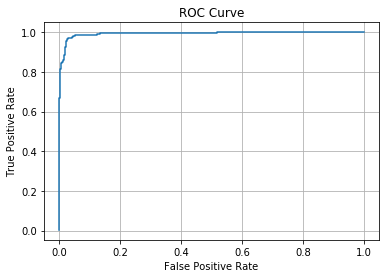

ROC AUC : 0.9930661558568535


In [12]:
#Lets use SVM:
#Bootstrapping
df1=df[['meanfreq','sd','meanfun','gender']]

#Producing X and y
X = df1.drop(['gender'], 1)
y = df1['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
classifier.fit(X_train, y_train)

print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)

Train accuracy : 0.9707971586424625
Test accuracy : 0.9779179810725552
[[294   7]
 [  7 326]]
Misclassification Rate : 0.022082018927444796


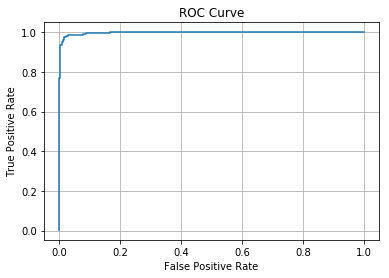

ROC AUC : 0.9970967645386251


In [13]:
#Lets use SVM:
#Bootstrapping

df1=df[['meanfun','IQR','Q25','sp.ent','sd','sfm','meanfreq','gender']]
#Producing X and y
X = df1.drop(['gender'], 1)
y = df1['gender']

from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
y = labelencoder1.fit_transform(y)

#Dividing the data randomly into training and test set
from sklearn.cross_validation import ShuffleSplit
rs =ShuffleSplit(n=3168,n_iter=30,train_size=.8,test_size=.2, random_state=0)

for train_index, test_index in rs:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.svm import SVC
from sklearn import svm
classifier = SVC(kernel = 'linear', random_state=10, gamma='auto')
classifier.fit(X_train, y_train)


print('Train accuracy :',classifier.score(X_train,y_train))
print('Test accuracy :',classifier.score(X_test,y_test))

y_pred=classifier.predict(X_test)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
c = confusion_matrix(y_test, y_pred)
# mcr is misclassification rate
mcr = ( c[0][1] + c[1][0] ) / ( c[0][0] + c[0][1] + c[1][0] + c[1][1] ) 
print('Misclassification Rate :',mcr)


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('ROC AUC :',roc_auc)